In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Load dataset
df = pd.read_csv('cleaned dataset.csv', index_col='datetime') # date time will be the identifier of the data points
df

,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Rain
datetime,,,,,,,,
2023-11-06 15:45:57,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0
2023-11-06 15:47:35,30.00,1009.0,74.0,81.0,2.06,0.0,1.0,0.0
2023-11-06 15:38:29,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0
2023-11-06 15:39:56,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0
2023-11-06 18:01:20,31.10,1010.0,72.0,20.0,4.12,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-23 21:05:10,26.94,1012.0,88.0,99.0,2.50,0.0,0.0,1.0
2023-11-24 00:01:24,27.12,1012.0,91.0,75.0,1.54,0.0,1.0,0.0
2023-11-24 00:03:06,26.03,1011.0,82.0,55.0,1.90,0.0,1.0,0.0


In [12]:
# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp']) # Inputs

# Separate temperature column into weather_y
camanava_y = df[['main.temp']] # Target feature

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)


Shape of camanava_x: (420, 7)
Shape of camanava_y: (420, 1)


# Multiple Linear Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(camanava_x, camanava_y, test_size=0.2, random_state=42)

# X columns = main.pressure  main.humidity  clouds.all  wind.speed weather.Clear  weather.Clouds  weather.Rain  
# Y columns = main.temp


In [13]:
# Splitting based on temporal data 
import pandas as pd
from sklearn.linear_model import LinearRegression

datasplit = int(len(camanava_x) * 0.8)

# Split the features
X_train = camanava_x[:datasplit]
X_test = camanava_x[datasplit:]

# Split the target variable
y_train = camanava_y[:datasplit]
y_test = camanava_y[datasplit:]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [14]:
# Initialize and train the Linear Regression model
model = LinearRegression() # Adjusts automatically to multiple linear regression if X has multiple features
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [15]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (84, 1)
Shape of y_pred: (84, 1)


In [16]:
#  Actual and Predicted values along with their differences
results1 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred.flatten(), 
    'Difference': (y_test.values - y_pred).flatten()
    })
print("Actual vs Predicted:")
results1.index = X_test.index  
results1


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-21 12:01:04,30.35,29.160941,1.189059
2023-11-21 12:02:41,30.27,31.525970,-1.255970
2023-11-21 12:03:02,30.29,29.309177,0.980823
2023-11-21 12:04:31,30.41,29.369833,1.040167
2023-11-21 15:01:10,30.41,29.823711,0.586289
...,...,...,...
2023-11-23 21:05:10,26.94,25.543913,1.396087
2023-11-24 00:01:24,27.12,25.009741,2.110259
2023-11-24 00:03:06,26.03,26.841854,-0.811854


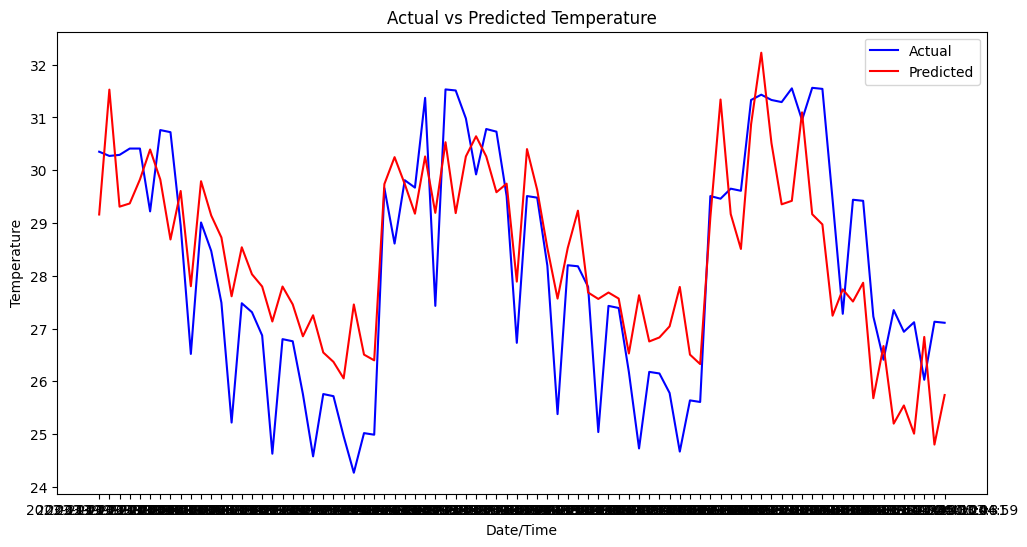

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results1.index, results1['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results1['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [18]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.026288823672974
